In [27]:
import sys
sys.path.append("..")

import Essentials

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [29]:
data_archive = np.load('../Data_First.npz', allow_pickle=True)

In [30]:
def prepare_Y(y):
    timestamp = y[:, 1]   
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

In [31]:
X_test_1 = data_archive['X_test_1']
X_train_1 = data_archive['X_train_1']

X_test_2 = data_archive['X_test_2']
X_train_2 = data_archive['X_train_2']

X_test_3 = data_archive['X_test_3']
X_train_3 = data_archive['X_train_3']

Y_test_1, timestamp_test_1 = prepare_Y(data_archive['Y_test_1'])
Y_train_1, timestamp_train_1 = prepare_Y(data_archive['Y_train_1'])

Y_test_2, timestamp_test_2 = prepare_Y(data_archive['Y_test_2'])
Y_train_2, timestamp_train_2 = prepare_Y(data_archive['Y_train_2'])

Y_test_3, timestamp_test_3 = prepare_Y(data_archive['Y_test_3'])
Y_train_3, timestamp_train_3 = prepare_Y(data_archive['Y_train_3'])

C:\Users\PC\AppData\Local\Temp\ipykernel_8676\4096890530.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = y.astype(np.float64)


In [32]:
class LR(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train):
        super().__init__(name)
        self.model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
        self.train(x_train, y_train)
        self.set_model(self.model)

    def preprocessing(self, x):
        return x
    
    def postprocessing(self, x):
        return x

    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions

    def train(self, x_train, y_train):
        self.model.fit(x_train,y_train)

    def __str__(self):
        pass

In [33]:
LR_test = LR("LR",X_train_2, Y_train_2)

In [34]:
metric = Essentials.R2Metric()

In [35]:
LR_test.test(X_test_2, Y_test_2, metric)

(array([[-1006.85564122],
        [ -933.66605819],
        [ -124.20031749],
        [   89.8149492 ],
        [   76.4088137 ],
        [   75.854131  ],
        [   65.6330337 ],
        [   85.28449953],
        [   41.98949   ],
        [   55.91577462],
        [   62.17010769],
        [   56.41176905],
        [   79.64066388],
        [  102.99886828],
        [  327.72782765],
        [   65.25680445],
        [   98.0397238 ],
        [   81.45813245],
        [   93.09291255],
        [  105.66795625],
        [   80.8806927 ],
        [   90.87744895],
        [   76.30742381],
        [   73.99449475],
        [   91.00887886],
        [   75.68907474],
        [   83.34161706],
        [   96.17697986],
        [  106.01573902],
        [  102.13610356],
        [   96.76576316],
        [   82.32465553],
        [   87.94759141],
        [  139.73041315],
        [  100.57782165]]),
 -1241.453891616573)

In [36]:
LR_test_visual_train = Essentials.Visualizer(X_train_2, Y_train_2, timestamp_train_2, [metric], 'LR SoftSensor R2 metric on Train')

    Coefficient of determination
LR                      0.839204


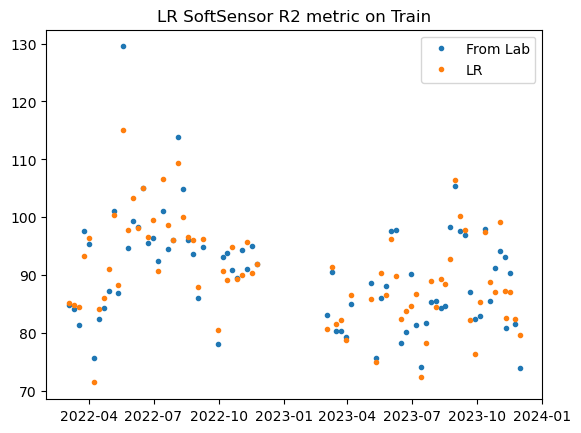

In [37]:
LR_test_visual_train.visualize([LR_test])

In [38]:
LR_test_visual_test = Essentials.Visualizer(X_test_2, Y_test_2, timestamp_test_2, [metric], 'LR SoftSensor R2 metric on Test')

    Coefficient of determination
LR                  -1241.453892


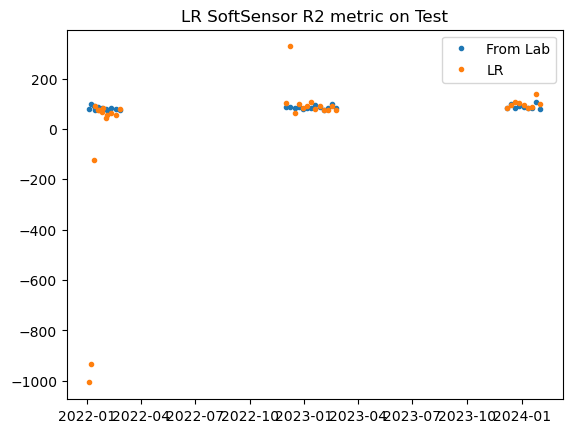

In [39]:
LR_test_visual_test.visualize([LR_test])